In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter
import datetime
import glob
import os

headers = ["Date", "Price", "Postcode"]
files = glob.glob("./*.csv")
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2023, 12, 31)
df = pd.concat(
    (pd.read_csv(f, usecols=headers).assign(Source=f'${f}') for f in files), 
    ignore_index=True
)
df = df[(df.Postcode.str.startswith("RG31"))]
df = df[(df.Price < 2000000)]
df.Date = pd.to_datetime(df.Date, errors='coerce')
df = df[(df.Date > start) & (df.Date < end)]
df.Price = pd.to_numeric(df.Price).div(1000)
df = df.sort_values(by=['Date'])

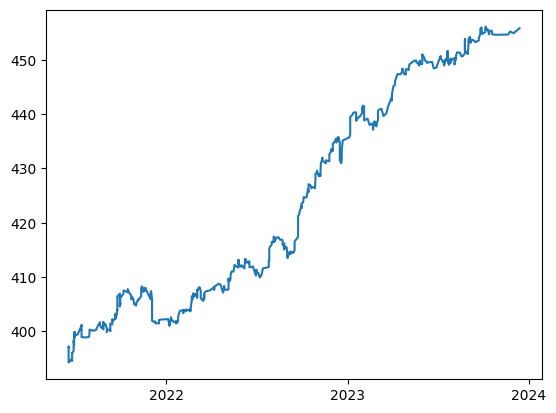

In [55]:
plt.plot(df.Date, df.Price.rolling(400).mean())
plt.gca().xaxis.set_major_locator(YearLocator())
plt.show()

In [52]:
monthly_counts = df.resample('ME', on='Date').size()
print(monthly_counts.tail(24))

Date
2022-01-31    16
2022-02-28    20
2022-03-31    16
2022-04-30    13
2022-05-31    24
2022-06-30    20
2022-07-31    21
2022-08-31    30
2022-09-30    23
2022-10-31    24
2022-11-30    22
2022-12-31    21
2023-01-31    20
2023-02-28    17
2023-03-31    13
2023-04-30    11
2023-05-31    15
2023-06-30    10
2023-07-31    22
2023-08-31    20
2023-09-30    17
2023-10-31    12
2023-11-30     2
2023-12-31     2
Freq: ME, dtype: int64


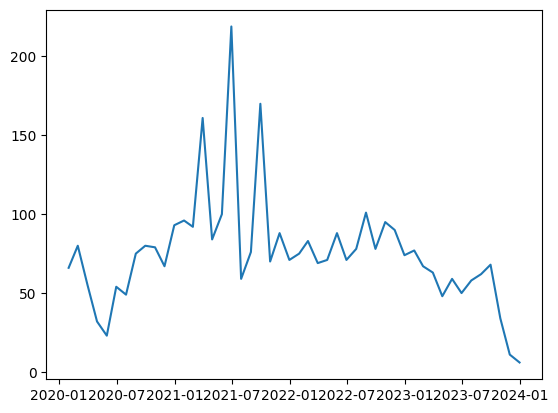

In [49]:
plt.plot(monthly_counts)
plt.show()